### Linear Regression Practical Implementation

- Cost Function + convergence algorithim
- OLS Method

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df= pd.read_csv('student_scores.csv')

In [3]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


Text(0, 0.5, 'Scores')

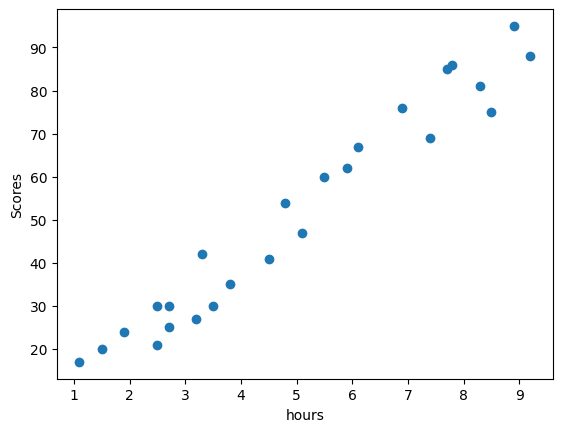

In [4]:
## scactter plot ------> to understand relationship between variables
plt.scatter(df['Hours'],df['Scores'])
plt.xlabel("hours")
plt.ylabel("Scores")

In [5]:
## correlation
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


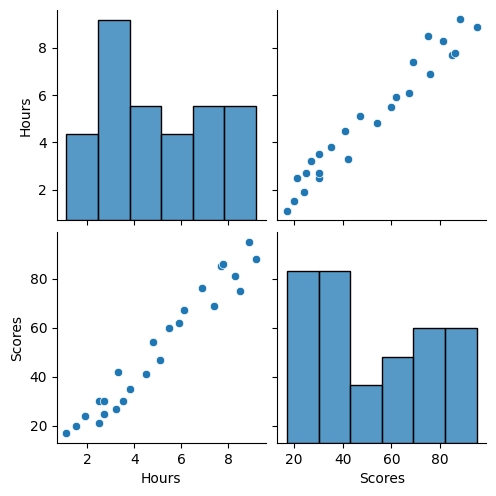

In [6]:
## seaborn for visualization
import seaborn as sns
sns.pairplot(df)


In [7]:
## independent and dependent features
X= df[['Hours']] ## independent feature should be dataframe or 2 dimentional array
y= df['Scores'] ## this feature can be series or 1d array

In [8]:
X_series=df['Hours']
np.array(X_series).shape

(25,)

In [9]:
np.array(y).shape

(25,)

In [10]:
## train test split
from sklearn.model_selection import train_test_split

In [11]:
X_train,X_test,y_train,y_test =train_test_split(X ,y ,test_size=0.25 ,random_state=42)

### Part-2 Linear Regression Project

In [12]:
## standerdization 
from sklearn.preprocessing import StandardScaler

In [13]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [14]:
X_test = scaler.transform(X_test)

In [15]:
X_test

array([[ 1.22741366],
       [-1.05269286],
       [-1.05269286],
       [ 0.67704312],
       [ 0.28392131],
       [-0.9740685 ],
       [-0.73819541]])

In [16]:
## apply simple linear regression 
from sklearn.linear_model import LinearRegression


In [17]:
regression = LinearRegression(n_jobs=-1)

In [18]:
regression.fit(X_train ,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,-1
,positive,False


In [19]:
dir(regression)

['__abstractmethods__',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__sklearn_clone__',
 '__sklearn_tags__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_build_request_for_signature',
 '_decision_function',
 '_doc_link_module',
 '_doc_link_template',
 '_doc_link_url_param_generator',
 '_estimator_type',
 '_get_default_requests',
 '_get_doc_link',
 '_get_metadata_request',
 '_get_param_names',
 '_get_params_html',
 '_html_repr',
 '_parameter_constraints',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_set_intercept',
 '_validate_params',
 'coef_',
 'copy_X',
 'fit',
 'fit_intercept',
 'get_metadata_routing',
 'get_params',
 

In [20]:
print("Coeffieciant or slope",regression.coef_)
print("Intercept",regression.intercept_)

Coeffieciant or slope [24.7101327]
Intercept 52.77777777777778


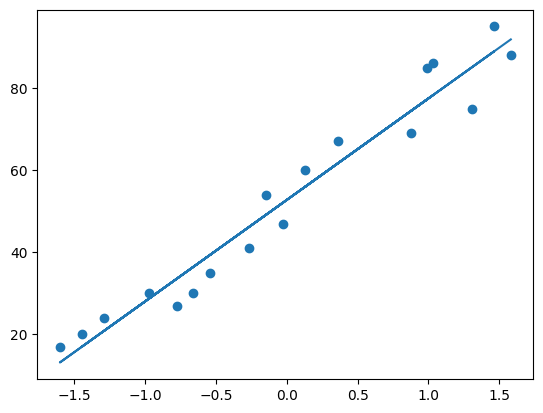

In [21]:
## plot training data ,plot best fit line 
plt.scatter(X_train,y_train)
plt.plot(X_train,regression.predict(X_train))

#### prediction of test data

1. predict height output =intercept +coeff_(Weights)
2. y_predict_test =156.470 +17.29(X_test)

In [22]:
y_pred = regression.predict(X_test)

In [23]:
## performance matrix
from sklearn.metrics import mean_absolute_error , mean_squared_error

In [24]:
mse = mean_squared_error(y_test,y_pred)
mae =mean_absolute_error(y_test ,y_pred)
rmse =np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

23.516396034595225
4.425394675156181
4.8493706843873285


### R Square
formula
R^2 =1 - SSR/SST  \
R^2 = coefficient of determination SSR =Sum of square of rediuals SST /total sum of square

In [25]:
from sklearn.metrics import r2_score

In [26]:
score = r2_score(y_test,y_pred)
print (score)

0.9553509219739938


##### Adjusted R2 = 1 -[(1-R2)*(n-1)/(n-k-1)]

where: \
R2 = The R2 of the model n = The number of observation k =The number of prediction variables


In [27]:
# display adjusted R-squared
1- (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.9464211063687926

In [29]:
# OLS Linear Regression
import statsmodels.api as sm

In [30]:
model = sm.OLS(y_train,X_train).fit()

In [31]:
prediction = model.predict(X_test)
print(prediction)

[ 30.32955451 -26.0121802  -26.0121802   16.72982544   7.01573325
 -24.06936177 -18.24090645]


In [32]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Scores   R-squared (uncentered):                   0.178
Model:                            OLS   Adj. R-squared (uncentered):              0.130
Method:                 Least Squares   F-statistic:                              3.685
Date:                Tue, 02 Sep 2025   Prob (F-statistic):                      0.0718
Time:                        09:01:08   Log-Likelihood:                         -97.031
No. Observations:                  18   AIC:                                      196.1
Df Residuals:                      17   BIC:                                      197.0
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [33]:
regression.predict(scaler.transform([[54]]))

c:\Users\ACC\Desktop\ml_projects\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([527.04134549])

In [34]:
##prediction for new data
regression.predict(scaler.transform([[72]]))

c:\Users\ACC\Desktop\ml_projects\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([701.89500496])